In [16]:
# !pip install PyPortfolioOpt

In [17]:
# ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨Îì§ÏùÑ Î∂àÎü¨ÏòµÎãàÎã§.
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ ÏµúÏ†ÅÌôîÎ•º ÏúÑÌïú PyPortfolioOpt ÎùºÏù¥Î∏åÎü¨Î¶¨
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import plotting

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Ï∂úÎ†• ÏòµÏÖò ÏÑ§Ï†ï
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

# --- ÏÑ§Ï†ïÍ∞í ---
INPUT_FILENAME = "top_50_zscore_rank_3Y.csv"
# ---

try:
    top_50_df = pd.read_csv(INPUT_FILENAME)
    tickers = top_50_df['Ticker'].tolist()
    tickers = list(set(tickers))

    print(f"‚úÖ '{INPUT_FILENAME}'ÏóêÏÑú ÏÉÅÏúÑ {len(tickers)}Í∞ú Ìã∞Ïª§Î•º Î∂àÎü¨ÏôîÏäµÎãàÎã§.")
    print(tickers)
except FileNotFoundError:
    print(f"‚ùå Ïò§Î•ò: '{INPUT_FILENAME}' ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§. Ïù¥Ï†Ñ Îã®Í≥ÑÎ•º Î®ºÏ†Ä Ïã§ÌñâÌï¥Ï£ºÏÑ∏Ïöî.")
    tickers = []



‚úÖ 'top_50_zscore_rank_3Y.csv'ÏóêÏÑú ÏÉÅÏúÑ 50Í∞ú Ìã∞Ïª§Î•º Î∂àÎü¨ÏôîÏäµÎãàÎã§.
['RKLB', 'CIFR', 'HCA', 'APP', 'APLD', 'IESC', 'VRNA', 'POWL', 'QUBT', 'HOOD', 'WULF', 'SKYX', 'CVNA', 'HIMS', 'CLS', 'UAMY', 'ACIC', 'RGTI', 'IONQ', 'PLTR', 'LMB', 'STRL', 'TPC', 'SMMT', 'STKE', 'INOD', 'MOD', 'IAG', 'PSIX', 'ROOT', 'AMSC', 'MFH', 'VRT', 'OKLO', 'DAVE', 'TSSI', 'VKTX', 'RYTM', 'SLNO', 'FTAI', 'PPTA', 'MAMA', 'AAOI', 'ASM', 'IREN', 'HRTG', 'QURE', 'ABBV', 'MSTR', 'CRDO']


In [18]:
# if tickers:
#     # Îç∞Ïù¥ÌÑ∞ ÏàòÏßë Í∏∞Í∞Ñ ÏÑ§Ï†ï (Ïò§ÎäòÎ∂ÄÌÑ∞ 3ÎÖÑ Ï†ÑÍπåÏßÄ)
#     end_date = datetime.today()
#     start_date = end_date - timedelta(days=3*365)
    
#     print(f"\n‚úÖ Îç∞Ïù¥ÌÑ∞ ÏàòÏßë Í∏∞Í∞Ñ: {start_date.strftime('%Y-%m-%d')} ~ {end_date.strftime('%Y-%m-%d')}")
    
#     # yfinanceÎ•º ÌÜµÌï¥ 50Í∞ú Ï¢ÖÎ™©Ïùò ÏàòÏ†ï Ï¢ÖÍ∞Ä Îç∞Ïù¥ÌÑ∞Î•º Îã§Ïö¥Î°úÎìúÌï©ÎãàÎã§.
#     prices = yf.download(tickers, start=start_date, end=end_date)['Adj Close'].dropna(how="all")
#     print("\n‚úÖ Ï£ºÍ∞Ä Îç∞Ïù¥ÌÑ∞ ÏàòÏßë ÏôÑÎ£å!")
#     display(prices.head())

In [19]:
if tickers:
    # Îç∞Ïù¥ÌÑ∞ ÏàòÏßë Í∏∞Í∞Ñ ÏÑ§Ï†ï
    end_date = datetime.today()
    start_date = end_date - timedelta(days=3*365)
    
    print(f"\n‚úÖ Îç∞Ïù¥ÌÑ∞ ÏàòÏßë Í∏∞Í∞Ñ: {start_date.strftime('%Y-%m-%d')} ~ {end_date.strftime('%Y-%m-%d')}")
    
    # yfinanceÎ•º ÌÜµÌï¥ Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Î•º Îã§Ïö¥Î°úÎìúÌï©ÎãàÎã§.
    # ÏµúÏã† Î≤ÑÏ†ÑÏóêÏÑúÎäî auto_adjust=TrueÍ∞Ä Í∏∞Î≥∏Í∞íÏù¥ÎØÄÎ°ú 'Adj Close'Í∞Ä ÏïÑÎãå 'Close'Î•º ÏÇ¨Ïö©Ìï©ÎãàÎã§.
    data = yf.download(tickers, start=start_date, end=end_date)
    
    # 'Close' Ïª¨ÎüºÎßå ÏÑ†ÌÉùÌï©ÎãàÎã§. (Ïù¥Í≤ÉÏù¥ Ïù¥Ï†ú ÏàòÏ†ï Ï¢ÖÍ∞ÄÏûÖÎãàÎã§)
    if isinstance(data.columns, pd.MultiIndex):
        prices = data['Close'] # Ïù¥ Î∂ÄÎ∂ÑÏùÑ ÏàòÏ†ï
    else:
        prices = data[['Close']] # Ïù¥ Î∂ÄÎ∂ÑÎèÑ ÏàòÏ†ï

    prices = prices.dropna(how="all")
    
    print("\n‚úÖ Ï£ºÍ∞Ä Îç∞Ïù¥ÌÑ∞ ÏàòÏßë ÏôÑÎ£å!")
    display(prices.head())




‚úÖ Îç∞Ïù¥ÌÑ∞ ÏàòÏßë Í∏∞Í∞Ñ: 2022-10-05 ~ 2025-10-04


C:\Users\k-271\AppData\Local\Temp\ipykernel_21688\3381222765.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)
[*********************100%***********************]  50 of 50 completed


‚úÖ Ï£ºÍ∞Ä Îç∞Ïù¥ÌÑ∞ ÏàòÏßë ÏôÑÎ£å!


Ticker      AAOI        ABBV      ACIC  AMSC  APLD        APP   ASM  CIFR  \
Date                                                                        
2022-10-05  3.01  128.038956  0.587340  4.77  1.65  20.760000  0.60  1.31   
2022-10-06  2.93  125.323250  0.606597  4.53  1.62  20.540001  0.60  1.27   
2022-10-07  2.78  123.956482  0.596969  4.31  1.55  19.219999  0.57  1.14   
2022-10-10  2.67  123.554489  0.596969  3.98  1.60  18.480000  0.54  1.12   
2022-10-11  2.63  126.413094  0.548826  3.88  1.68  17.770000  0.54  1.04   

Ticker       CLS   CRDO       CVNA    DAVE       FTAI         HCA  HIMS  \
Date                                                                      
2022-10-05  9.11  11.61  21.549999  14.112  15.727021  197.501572  5.70   
2022-10-06  9.07  11.57  21.129999  14.144  15.689972  196.516708  5.65   
2022-10-07  8.99  10.99  19.270000  12.512  14.745241  195.473343  5.38   
2022-10-10  8.73  10.34  18.209999  12.064  14.198777  194.137421  4.99   
2022-10-11  8.55   9.88  18.320000  11.840  14.143205  197.647888  5.05   

Ticker       HOOD  HRTG   IAG       IESC  INOD  IONQ  IREN   LMB  MAMA  \
Date                                                                     
2022-10-05  10.76  2.33  1.16  29.090000  3.40  5.71  4.49  8.02  1.09   
2022-10-06  11.17  2.20  1.14  28.790001  3.31  5.64  4.40  8.05  1.09   
2022-10-07  10.80  2.01  1.11  28.379999  3.41  5.28  3.71  7.69  1.09   
2022-10-10  10.52  1.82  1.07  29.260000  3.28  5.07  3.57  7.75  1.10   
2022-10-11  10.44  1.62  1.08  28.570000  3.27  4.89  3.41  7.62  1.09   

Ticker           MFH    MOD       MSTR  OKLO  PLTR       POWL  PPTA  PSIX  \
Date                                                                        
2022-10-05  0.938889  14.05  24.219000  9.73  8.42  21.045553  2.17   1.6   
2022-10-06  0.956667  13.66  24.167000  9.73  8.47  20.419195  2.14   1.7   
2022-10-07  0.911111  13.23  22.030001  9.75  8.15  20.293924  1.94   1.5   
2022-10-10  0.975556  13.39  22.065001  9.75  8.06  20.245747  1.81   1.5   
2022-10-11  1.177778  13.58  21.636999  9.74  8.04  20.274651  1.88   1.5   

Ticker      QUBT       QURE  RGTI  RKLB  ROOT       RYTM  SKYX  SLNO  SMMT  \
Date                                                                         
2022-10-05  2.42  20.110001  1.96  4.61  9.09  26.010000  3.30  1.72  1.06   
2022-10-06  2.40  20.209999  1.96  4.62  8.64  25.840000  3.43  1.73  1.09   
2022-10-07  2.31  19.290001  1.89  4.36  8.20  23.950001  3.32  1.56  1.02   
2022-10-10  2.05  18.600000  1.94  4.30  8.38  23.240000  3.28  1.50  1.13   
2022-10-11  2.07  18.830000  1.90  4.19  8.52  23.549999  3.37  1.39  1.09   

Ticker       STKE       STRL   TPC  TSSI  UAMY  VKTX   VRNA        VRT  WULF  
Date                                                                          
2022-10-05  0.480  23.230000  6.17  0.55  0.38  2.90  10.60  11.947321  1.54  
2022-10-06  0.208  23.379999  5.92  0.61  0.38  2.95  10.41  11.817783  1.78  
2022-10-07  0.360  22.450001  5.75  0.61  0.36  2.87  10.13  10.911024  1.36  
2022-10-10  0.320  22.809999  5.95  0.61  0.36  2.83   9.98  11.199991  1.30  
2022-10-11  0.320  22.660000  5.88  0.61  0.36  2.94   9.97  11.040563  1.13

In [20]:
if not prices.empty:
    # 1. Ïó∞Í∞Ñ Í∏∞ÎåÄÏàòÏùµÎ•† Í≥ÑÏÇ∞ (Í≥ºÍ±∞ Îç∞Ïù¥ÌÑ∞ Í∏∞Î∞ò)
    mu = expected_returns.mean_historical_return(prices)
    # mu = expected_returns.ema_historical_return(prices)
    
    # 2. Ïó∞Í∞Ñ Í≥µÎ∂ÑÏÇ∞ ÌñâÎ†¨ Í≥ÑÏÇ∞ (ÏúÑÌóò Î™®Îç∏)
    S = risk_models.sample_cov(prices)
    
    print("‚úÖ Ïó∞Í∞Ñ Í∏∞ÎåÄÏàòÏùµÎ•† (mu):")
    display(mu.head())
    print("\n‚úÖ Ïó∞Í∞Ñ Í≥µÎ∂ÑÏÇ∞ ÌñâÎ†¨ (S):")
    display(S.head())

‚úÖ Ïó∞Í∞Ñ Í∏∞ÎåÄÏàòÏùµÎ•† (mu):


Ticker
AAOI    1.111780
ABBV    0.224098
ACIC    1.725732
AMSC    1.329563
APLD    1.539577
dtype: float64


‚úÖ Ïó∞Í∞Ñ Í≥µÎ∂ÑÏÇ∞ ÌñâÎ†¨ (S):


Ticker      AAOI      ABBV      ACIC      AMSC      APLD       APP       ASM  \
Ticker                                                                         
AAOI    1.504019  0.004930  0.054033  0.377327  0.354679  0.318581  0.095497   
ABBV    0.004930  0.053323  0.000325  0.004390 -0.008559  0.005776  0.018080   
ACIC    0.054033  0.000325  1.122977  0.097444  0.186943  0.036344 -0.002482   
AMSC    0.377327  0.004390  0.097444  0.857890  0.306298  0.185994  0.070453   
APLD    0.354679 -0.008559  0.186943  0.306298  1.674390  0.206788  0.127317   

Ticker      CIFR       CLS      CRDO      CVNA      DAVE      FTAI       HCA  \
Ticker                                                                         
AAOI    0.430719  0.254566  0.324495  0.347553  0.254459  0.157284  0.019586   
ABBV    0.007663  0.001486 -0.001839 -0.010168  0.008341  0.009924  0.011448   
ACIC    0.116858  0.028694 -0.011125  0.063958  0.070459  0.025839  0.019164   
AMSC    0.269856  0.150555  0.199986  0.324313  0.188645  0.115192  0.023389   
APLD    0.559576  0.161340  0.211138  0.318003  0.177789  0.097273  0.008650   

Ticker      HIMS      HOOD      HRTG       IAG      IESC      INOD      IONQ  \
Ticker                                                                         
AAOI    0.217595  0.262264  0.071032  0.092393  0.233330  0.430723  0.380243   
ABBV    0.006577  0.006796  0.010033  0.009086  0.002777 -0.005276  0.003161   
ACIC    0.013454  0.042144  0.186790  0.043146  0.056314  0.093336  0.089266   
AMSC    0.185528  0.183925  0.093896  0.079138  0.177301  0.332639  0.279244   
APLD    0.174227  0.250618  0.054932  0.102252  0.149939  0.292299  0.385669   

Ticker      IREN       LMB      MAMA       MFH       MOD      MSTR      OKLO  \
Ticker                                                                         
AAOI    0.385909  0.163233  0.048807  0.041146  0.232070  0.268888  0.189092   
ABBV   -0.014745  0.001730  0.004509 -0.024947  0.000171 -0.012382  0.000841   
ACIC    0.061341  0.054335  0.096936  0.022962  0.011622  0.050321 -0.032557   
AMSC    0.294056  0.157882  0.050117  0.089406  0.174741  0.240037  0.163552   
APLD    0.490362  0.162320  0.087129  0.164632  0.193529  0.319455  0.238873   

Ticker      PLTR      POWL      PPTA      PSIX      QUBT      QURE      RGTI  \
Ticker                                                                         
AAOI    0.256923  0.161328  0.067616  0.178257  0.383588  0.112336  0.418554   
ABBV    0.008657  0.000611  0.004971 -0.000736  0.014343  0.008060  0.003890   
ACIC    0.055656  0.053022  0.056191  0.075544  0.044407  0.053516  0.061895   
AMSC    0.185849  0.103393  0.104817  0.093109  0.206862  0.098138  0.348151   
APLD    0.219695  0.159558  0.183081  0.128652  0.297276 -0.008323  0.389007   

Ticker      RKLB      ROOT      RYTM      SKYX      SLNO      SMMT      STKE  \
Ticker                                                                         
AAOI    0.224335  0.099519  0.130229  0.172887  0.107059  0.084236  0.295848   
ABBV    0.004331  0.010515  0.020407  0.008328  0.004768  0.027216 -0.014207   
ACIC    0.051084  0.028284  0.066735  0.086860 -0.083008  0.002126 -0.057404   
AMSC    0.222488  0.176795  0.181418  0.164766  0.030090  0.185792  0.101200   
APLD    0.233373  0.164358  0.102279  0.127058  0.115500  0.040196 -0.015867   

Ticker      STRL       TPC      TSSI      UAMY      VKTX      VRNA       VRT  \
Ticker                                                                         
AAOI    0.168391  0.126262  0.240410  0.155934  0.198939  0.115503  0.279806   
ABBV   -0.002155 -0.000065  0.017693  0.010680  0.033171  0.012761 -0.000818   
ACIC    0.038280  0.016117  0.061392  0.017625  0.067719  0.060355  0.009551   
AMSC    0.152642  0.165476  0.186687  0.096010  0.108065  0.111862  0.154093   
APLD    0.157156  0.150972  0.323535  0.179961  0.151354  0.087263  0.193622   

Ticker      WULF  
Ticker            
AAOI    0.412886  
ABBV    0.003880

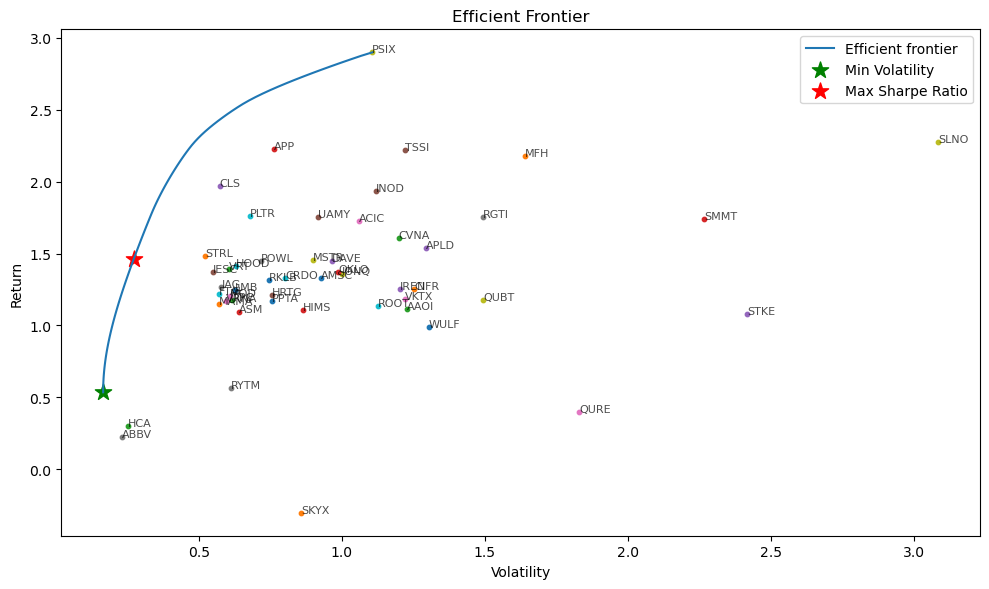


--- ÏµúÏÜå Î≥ÄÎèôÏÑ± Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ ---
Í∏∞ÎåÄÏàòÏùµÎ•†: 53.52%, Î≥ÄÎèôÏÑ±(Î¶¨Ïä§ÌÅ¨): 16.57%

--- ÏµúÎåÄ ÏÉ§ÌîÑ ÏßÄÏàò Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ ---
Í∏∞ÎåÄÏàòÏùµÎ•†: 146.39%, Î≥ÄÎèôÏÑ±(Î¶¨Ïä§ÌÅ¨): 27.31%


In [21]:

# 'mu'ÏôÄ 'S'Îäî Ïù¥ÎØ∏ Í≥ÑÏÇ∞ÎêòÏóàÎã§Í≥† Í∞ÄÏ†ïÌï©ÎãàÎã§.
if 'mu' in locals() and 'S' in locals():
    
    # 1. ÏµúÏÜå Î≥ÄÎèôÏÑ± Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Í≥ÑÏÇ∞
    # Í∞ùÏ≤¥Î•º ÏÉàÎ°ú ÏÉùÏÑ±Ìï©ÎãàÎã§.
    ef_min_vol = EfficientFrontier(mu, S)
    min_vol_weights = ef_min_vol.min_volatility()
    min_vol_ret, min_vol_risk, _ = ef_min_vol.portfolio_performance()
    
    # 2. ÏµúÎåÄ ÏÉ§ÌîÑ ÏßÄÏàò Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Í≥ÑÏÇ∞
    # Í∞ùÏ≤¥Î•º Îã§Ïãú ÏÉàÎ°ú ÏÉùÏÑ±Ìï©ÎãàÎã§.
    ef_max_sharpe = EfficientFrontier(mu, S)
    max_sharpe_weights = ef_max_sharpe.max_sharpe()
    max_sharpe_ret, max_sharpe_risk, _ = ef_max_sharpe.portfolio_performance()

    # 3. ÏãúÍ∞ÅÌôî (Ìö®Ïú®Ï†Å Ìà¨ÏûêÏÑ†ÏùÄ Ìïú Î≤àÎßå Í≥ÑÏÇ∞)
    ef_for_plotting = EfficientFrontier(mu, S)
    fig, ax = plt.subplots(figsize=(10, 6))
    plotting.plot_efficient_frontier(ef_for_plotting, ax=ax, show_assets=False)
    
    # Í≥ÑÏÇ∞Îêú Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Í≤∞Í≥º ÌîåÎ°úÌåÖ
    ax.scatter(min_vol_risk, min_vol_ret, marker="*", color="g", s=150, label="Min Volatility")
    ax.scatter(max_sharpe_risk, max_sharpe_ret, marker="*", color="r", s=150, label="Max Sharpe Ratio")

    # # Í∞Å Ìè¨Ìä∏Ìè¥Î¶¨Ïò§Ïùò Ìã∞Ïª§Î≥Ñ ÏúÑÏπò ÌëúÏãú
    for ticker in tickers:
        ret = mu[ticker]
        risk = np.sqrt(S.loc[ticker, ticker])
        ax.scatter(risk, ret, marker="o", s=10)
        ax.text(risk, ret, ticker, fontsize=8, alpha=0.7)
    

    # Í∑∏ÎûòÌîÑ Ïä§ÌÉÄÏùº ÏÑ§Ï†ï
    ax.set_title("Efficient Frontier")
    ax.legend()
    plt.tight_layout()
    plt.show()
    
    print("\n--- ÏµúÏÜå Î≥ÄÎèôÏÑ± Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ ---")
    print(f"Í∏∞ÎåÄÏàòÏùµÎ•†: {min_vol_ret:.2%}, Î≥ÄÎèôÏÑ±(Î¶¨Ïä§ÌÅ¨): {min_vol_risk:.2%}")
    
    print("\n--- ÏµúÎåÄ ÏÉ§ÌîÑ ÏßÄÏàò Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ ---")
    print(f"Í∏∞ÎåÄÏàòÏùµÎ•†: {max_sharpe_ret:.2%}, Î≥ÄÎèôÏÑ±(Î¶¨Ïä§ÌÅ¨): {max_sharpe_risk:.2%}")

In [22]:
def print_weights(weights):
    """Í∞ÄÏ§ëÏπòÎ•º ÍπîÎÅîÌïòÍ≤å Ï∂úÎ†•ÌïòÎäî Ìï®Ïàò"""
    weights_series = pd.Series(weights)
    # Í∞ÄÏ§ëÏπòÍ∞Ä 0.1% Ïù¥ÏÉÅÏù∏ Ï¢ÖÎ™©Îßå Ï∂úÎ†•
    print(weights_series[weights_series > 0.001].sort_values(ascending=False).to_string())

if 'ef' in locals():
    # Î¶¨Ïä§ÌÅ¨ Î≤îÏúÑÎ•º Ï†ïÏùòÌï©ÎãàÎã§ (ÏµúÏÜå Î≥ÄÎèôÏÑ± ~ ÏµúÎåÄ ÏÉ§ÌîÑ ÏßÄÏàò)
    min_risk_level = min_vol_risk
    max_risk_level = max_sharpe_risk
    risk_range = max_risk_level - min_risk_level
    
    # Î™©Ìëú Î¶¨Ïä§ÌÅ¨ ÏàòÏ§ÄÏùÑ ÌçºÏÑºÌä∏Î°ú Ï†ïÏùò
    target_risk_percentages = [0.60, 0.65, 0.70, 0.80, 0.90, 1.00]
    
    print("\n" + "="*50)
    print("           ÌäπÏ†ï Î¶¨Ïä§ÌÅ¨ ÏàòÏ§ÄÎ≥Ñ Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Í∞ÄÏ§ëÏπò")
    print("="*50 + "\n")
    
    for p in target_risk_percentages:
        # Î™©Ìëú Î≥ÄÎèôÏÑ±(Î¶¨Ïä§ÌÅ¨) Í∞íÏùÑ Í≥ÑÏÇ∞
        target_risk = min_risk_level + risk_range * p
        
        print(f"--- Î¶¨Ïä§ÌÅ¨ ÏàòÏ§Ä: {p:.0%} (Î™©Ìëú Î≥ÄÎèôÏÑ±: {target_risk:.2%}) ---")
        
        try:
            # Ìï¥Îãπ Î™©Ìëú Î¶¨Ïä§ÌÅ¨Î•º Îã¨ÏÑ±ÌïòÎäî Ìè¨Ìä∏Ìè¥Î¶¨Ïò§Î•º Í≥ÑÏÇ∞
            ef_target_risk = EfficientFrontier(mu, S)

            target_weights = ef_target_risk.efficient_risk(target_volatility=target_risk)
            
            # Í∞ÄÏ§ëÏπò Ï∂úÎ†•
            print_weights(target_weights)
            print("\n" + "-"*50 + "\n")
            
        except Exception as e:
            print(f"Ìï¥Îãπ Î¶¨Ïä§ÌÅ¨ ÏàòÏ§ÄÏùò Ìè¨Ìä∏Ìè¥Î¶¨Ïò§Î•º Í≥ÑÏÇ∞Ìï† Ïàò ÏóÜÏäµÎãàÎã§: {e}\n")

In [23]:
import json # JSON ÎùºÏù¥Î∏åÎü¨Î¶¨ Ï∂îÍ∞Ä

def print_weights(weights):
    """Í∞ÄÏ§ëÏπòÎ•º ÍπîÎÅîÌïòÍ≤å Ï∂úÎ†•ÌïòÎäî Ìï®Ïàò"""
    weights_series = pd.Series(weights)
    # Í∞ÄÏ§ëÏπòÍ∞Ä 0.1% Ïù¥ÏÉÅÏù∏ Ï¢ÖÎ™©Îßå Ï∂úÎ†•
    print(weights_series[weights_series > 0.001].sort_values(ascending=False).to_string())

if 'ef' in locals():
    # Î¶¨Ïä§ÌÅ¨ Î≤îÏúÑÎ•º Ï†ïÏùòÌï©ÎãàÎã§ (ÏµúÏÜå Î≥ÄÎèôÏÑ± ~ ÏµúÎåÄ ÏÉ§ÌîÑ ÏßÄÏàò)
    min_risk_level = min_vol_risk
    max_risk_level = max_sharpe_risk
    risk_range = max_risk_level - min_risk_level
    
    # Î™©Ìëú Î¶¨Ïä§ÌÅ¨ ÏàòÏ§ÄÏùÑ ÌçºÏÑºÌä∏Î°ú Ï†ïÏùò
    target_risk_percentages = [0.60, 0.65, 0.70, 0.80, 0.90, 1.00]
    
    print("\n" + "="*50)
    print("           ÌäπÏ†ï Î¶¨Ïä§ÌÅ¨ ÏàòÏ§ÄÎ≥Ñ Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Í∞ÄÏ§ëÏπò")
    print("="*50 + "\n")
    
    for p in target_risk_percentages:
        # Î™©Ìëú Î≥ÄÎèôÏÑ±(Î¶¨Ïä§ÌÅ¨) Í∞íÏùÑ Í≥ÑÏÇ∞
        target_risk = min_risk_level + risk_range * p
        
        print(f"--- Î¶¨Ïä§ÌÅ¨ ÏàòÏ§Ä: {p:.0%} (Î™©Ìëú Î≥ÄÎèôÏÑ±: {target_risk:.2%}) ---")
        
        try:
            # Ìï¥Îãπ Î™©Ìëú Î¶¨Ïä§ÌÅ¨Î•º Îã¨ÏÑ±ÌïòÎäî Ìè¨Ìä∏Ìè¥Î¶¨Ïò§Î•º Í≥ÑÏÇ∞
            ef_target_risk = EfficientFrontier(mu, S)

            target_weights = ef_target_risk.efficient_risk(target_volatility=target_risk)
            
            # Í∞ÄÏ§ëÏπò Ï∂úÎ†•
            print_weights(target_weights)

            # üìå Ï∂îÍ∞ÄÎêú Î∂ÄÎ∂Ñ: pÍ∞Ä 0.65Ïùº Îïå JSON ÌååÏùºÎ°ú Ï†ÄÏû•
            if p == 0.65:
                # Í∞ÄÏ§ëÏπòÍ∞Ä 0.1% Ïù¥ÏÉÅÏù∏ Ï¢ÖÎ™©Îßå ÌïÑÌÑ∞ÎßÅÌïòÏó¨ ÏÉàÎ°úÏö¥ ÎîïÏÖîÎÑàÎ¶¨ ÏÉùÏÑ±
                weights_to_save = {ticker: weight for ticker, weight in target_weights.items() if weight > 0.001}
                
                output_json_filename = 'portfolio_weights_65_risk.json'
                with open(output_json_filename, 'w', encoding='utf-8') as f:
                    json.dump(weights_to_save, f, ensure_ascii=False, indent=4)
                
                print(f"\n  ‚ú® 65% Î¶¨Ïä§ÌÅ¨ Ìè¨Ìä∏Ìè¥Î¶¨Ïò§Í∞Ä '{output_json_filename}' ÌååÏùºÎ°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")

            print("\n" + "-"*50 + "\n")
            
        except Exception as e:
            print(f"Ìï¥Îãπ Î¶¨Ïä§ÌÅ¨ ÏàòÏ§ÄÏùò Ìè¨Ìä∏Ìè¥Î¶¨Ïò§Î•º Í≥ÑÏÇ∞Ìï† Ïàò ÏóÜÏäµÎãàÎã§: {e}\n")

In [24]:

# Îß•Ïä§ ÏÉ§ÌîÑ ÎπÑÏú® Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Í∞ÄÏ§ëÏπòÎ•º JSON ÌååÏùºÎ°ú Ï†ÄÏû•
if 'max_sharpe_weights' in locals():
    # Í∞ÄÏ§ëÏπòÍ∞Ä 0.1% Ïù¥ÏÉÅÏù∏ Ï¢ÖÎ™©Îßå ÌïÑÌÑ∞ÎßÅ
    filtered_weights = {ticker: weight for ticker, weight in max_sharpe_weights.items() if weight > 0.001}
    
    # JSON ÌååÏùºÎ°ú Ï†ÄÏû•
    output_json_filename = 'portfolio_weights_max_sharpe.json'
    with open(output_json_filename, 'w', encoding='utf-8') as f:
        json.dump(filtered_weights, f, ensure_ascii=False, indent=4)
    
    print(f"\n‚úÖ Îß•Ïä§ ÏÉ§ÌîÑ ÎπÑÏú® Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Í∞ÄÏ§ëÏπòÍ∞Ä '{output_json_filename}' ÌååÏùºÎ°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")
    print(f"   - Ï¢ÖÎ™© Ïàò: {len(filtered_weights)}")
    print(f"   - Í∞ÄÏ§ëÏπò Ìï©Í≥Ñ: {sum(filtered_weights.values()):.4f}")


‚úÖ Îß•Ïä§ ÏÉ§ÌîÑ ÎπÑÏú® Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Í∞ÄÏ§ëÏπòÍ∞Ä 'portfolio_weights_max_sharpe.json' ÌååÏùºÎ°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.
   - Ï¢ÖÎ™© Ïàò: 20
   - Í∞ÄÏ§ëÏπò Ìï©Í≥Ñ: 1.0000


In [29]:
input_filename = 'portfolio_weights_max_sharpe.json'
try:
    with open(input_filename, 'r', encoding='utf-8') as f:
        weights = json.load(f)
    
    # ÌòÑÏû¨ Í∞ÄÏ§ëÏπò Ìï©Í≥Ñ Í≥ÑÏÇ∞
    current_sum = sum(weights.values())
    
    # Í∏∞Ï°¥ Í∞ÄÏ§ëÏπòÎ•º Ï°∞Ï†ïÌïòÏó¨ Ï¥ùÌï©Ïù¥ 0.6Ïù¥ ÎêòÎèÑÎ°ù Ïä§ÏºÄÏùºÎßÅ
    M_V = 0.4

    # Î™®Îì† Í∞ÄÏ§ëÏπòÎ•º ÏÜåÏàòÏ†ê ÏûêÎ¶¨ÍπåÏßÄ Î∞òÏò¨Î¶º
    scaling_factor = 1-M_V / current_sum
    scaled_weights = {ticker: weight * scaling_factor for ticker, weight in weights.items()}
    rounded_weights = {ticker: round(weight, 3) for ticker, weight in scaled_weights.items()}

    # MONEY Ìã∞Ïª§ Ï∂îÍ∞Ä (ÎπÑÏ§ë 0.4)
    scaled_weights['MONEY'] = M_V

    # ÎùºÏö¥Îî©ÏúºÎ°ú Ïù∏Ìïú Ïò§Ï∞®Î•º Î≥¥Ï†ïÌïòÏó¨ Ï†ïÌôïÌûà Ìï©Í≥ÑÍ∞Ä 1Ïù¥ ÎêòÎèÑÎ°ù Ï°∞Ï†ï
    total_after_rounding = sum(rounded_weights.values())
    if total_after_rounding != 1.00:
        # Í∞ÄÏû• ÌÅ∞ Í∞ÄÏ§ëÏπòÎ•º Í∞ÄÏßÑ Ìã∞Ïª§Ïóê Ïò§Ï∞®Î•º ÎçîÌïòÍ±∞ÎÇò ÎπºÏÑú Ìï©Í≥ÑÎ•º 1Î°ú ÎßûÏ∂§
        max_ticker = max(rounded_weights.items(), key=lambda x: x[1] if x[0] != 'MONEY' else 0)[0]
        rounded_weights[max_ticker] = round(rounded_weights[max_ticker] + (1.00 - total_after_rounding), 3)
    
    # ÏµúÏ¢Ö Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Í∞ÄÏ§ëÏπòÎ•º JSON ÌååÏùºÎ°ú Ï†ÄÏû•
    output_filename = 'final_portfolio_weights.json'
    with open(output_filename, 'w', encoding='utf-8') as f:
        json.dump(rounded_weights, f, ensure_ascii=False, indent=4)
    
    print(f"\n‚úÖ ÏµúÏ¢Ö Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Í∞ÄÏ§ëÏπòÍ∞Ä '{output_filename}' ÌååÏùºÎ°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")
    print(f"   - MONEY ÎπÑÏ§ë: {rounded_weights.get('MONEY', 0):.3f}")
    print(f"   - Í∏∞ÌÉÄ ÏûêÏÇ∞ ÎπÑÏ§ë Ï¥ùÌï©: {sum(rounded_weights.values()) - rounded_weights.get('MONEY', 0):.3f}")
    print(f"   - Ï†ÑÏ≤¥ ÎπÑÏ§ë Ï¥ùÌï©: {sum(rounded_weights.values()):.3f}")
    
except FileNotFoundError:
    print(f"‚ùå Ïò§Î•ò: '{input_filename}' ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§. Ïù¥Ï†Ñ Îã®Í≥ÑÎ•º Î®ºÏ†Ä Ïã§ÌñâÌï¥Ï£ºÏÑ∏Ïöî.")
except Exception as e:
    print(f"‚ùå Ïò§Î•ò Î∞úÏÉù: {str(e)}")


‚úÖ ÏµúÏ¢Ö Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Í∞ÄÏ§ëÏπòÍ∞Ä 'final_portfolio_weights.json' ÌååÏùºÎ°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.
   - MONEY ÎπÑÏ§ë: 0.000
   - Í∏∞ÌÉÄ ÏûêÏÇ∞ ÎπÑÏ§ë Ï¥ùÌï©: 1.000
   - Ï†ÑÏ≤¥ ÎπÑÏ§ë Ï¥ùÌï©: 1.000


In [30]:
import json

# --- ÏÑ§Ï†ï ---
# 1. ÏµúÎåÄ ÏÉ§ÌîÑ ÏßÄÏàò Í∞ÄÏ§ëÏπòÍ∞Ä Ï†ÄÏû•Îêú JSON ÌååÏùº Í≤ΩÎ°ú
max_sharpe_weights_path = r'final_portfolio_weights.json'
# 2. ÏµúÏ¢Ö Ìè¨Ìä∏Ìè¥Î¶¨Ïò§Î•º Ï†ÄÏû•Ìï† ÌååÏùº Í≤ΩÎ°ú (ÏÑ†ÌÉù ÏÇ¨Ìï≠)
final_portfolio_path = r'final_portfolio_with_cash.json'

# 3. Í≥†Ï†ïÌï† ÌòÑÍ∏à(MONEY) ÎπÑÏ§ë
CASH_WEIGHT = 0.4
# 4. ÎÇòÎ®∏ÏßÄ ÏûêÏÇ∞Ïóê Ìï†ÎãπÎê† ÎπÑÏ§ë
EQUITY_WEIGHT = 1 - CASH_WEIGHT

# --- Î°úÏßÅ ---
# Í∏∞Ï°¥ Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Í∞ÄÏ§ëÏπò Î°úÎìú
with open(max_sharpe_weights_path, 'r', encoding='utf-8') as f:
    original_weights = json.load(f)

# ÏÉàÎ°úÏö¥ Í∞ÄÏ§ëÏπòÎ•º Í≥ÑÏÇ∞Ìï† ÎîïÏÖîÎÑàÎ¶¨ ÏÉùÏÑ±
adjusted_weights = {}

# Í∞Å ÏûêÏÇ∞Ïùò Í∞ÄÏ§ëÏπòÎ•º ÎÇ®ÏùÄ ÎπÑÏ§ë(0.6)Ïóê ÎßûÏ∂∞ Ïû¨Í≥ÑÏÇ∞ÌïòÍ≥† ÏÜåÏàòÏ†ê 3ÏûêÎ¶¨ÏóêÏÑú Î∞òÏò¨Î¶º
for ticker, weight in original_weights.items():
    adjusted_weights[ticker] = round(weight * EQUITY_WEIGHT, 3)

# Î∞òÏò¨Î¶º ÌõÑ MONEYÎ•º Ï†úÏô∏Ìïú ÎÇòÎ®∏ÏßÄÏùò Ìï©Í≥Ñ Í≥ÑÏÇ∞
equity_sum = sum(adjusted_weights.values())

# MONEYÎ•º Ï†úÏô∏Ìïú ÎÇòÎ®∏ÏßÄÏùò Ìï©Ïù¥ Ï†ïÌôïÌûà 0.6Ïù¥ ÎêòÎèÑÎ°ù Ï°∞Ï†ï
if equity_sum != EQUITY_WEIGHT:
    # Í∞ÄÏû• ÌÅ∞ Í∞ÄÏ§ëÏπòÎ•º Í∞ÄÏßÑ ÏûêÏÇ∞Ïóê Ïò§Ï∞®Î•º Î≥¥Ï†ï
    difference = round(EQUITY_WEIGHT - equity_sum, 3)
    max_ticker = max(adjusted_weights.items(), key=lambda x: x[1])[0]
    adjusted_weights[max_ticker] = round(adjusted_weights[max_ticker] + difference, 3)

# ÌòÑÍ∏à ÎπÑÏ§ë Ï∂îÍ∞Ä
adjusted_weights['MONEY'] = CASH_WEIGHT

# --- Í≤∞Í≥º ÌôïÏù∏ ---
print("‚úÖ ÌòÑÍ∏à ÎπÑÏ§ë 0.4Î•º Ï†ÅÏö©ÌïòÏó¨ Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Í∞ÄÏ§ëÏπòÎ•º Ïû¨Ï°∞Ï†ïÌñàÏäµÎãàÎã§.")
print("\n--- ÏµúÏ¢Ö Ï°∞Ï†ïÎêú Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Í∞ÄÏ§ëÏπò ---")

# Î≥¥Í∏∞ Ï¢ãÍ≤å Ï†ïÎ†¨ÌïòÏó¨ Ï∂úÎ†•
for ticker, weight in sorted(adjusted_weights.items()):
    print(f"- {ticker:<6}: {weight:.3f}")

print("---------------------------------------")
# MONEYÎ•º Ï†úÏô∏Ìïú ÏûêÏÇ∞Îì§Ïùò Ìï©Í≥ÑÏôÄ Ï†ÑÏ≤¥ Ìï©Í≥Ñ Í≤ÄÏ¶ù
equity_total = sum(v for k, v in adjusted_weights.items() if k != 'MONEY')
total_weight = sum(adjusted_weights.values())
print(f"üìä MONEY Ï†úÏô∏ Ï¥ù Í∞ÄÏ§ëÏπò: {equity_total:.3f}")
print(f"üìä Ï†ÑÏ≤¥ Í∞ÄÏ§ëÏπò Ìï©Í≥Ñ: {total_weight:.3f}")


# --- ÌååÏùº Ï†ÄÏû• (ÌïÑÏöîÏãú Ï£ºÏÑù Ìï¥Ï†ú) ---
with open(final_portfolio_path, 'w', encoding='utf-8') as f:
    json.dump(adjusted_weights, f, indent=4)
print(f"\n‚úÖ Ï°∞Ï†ïÎêú Ìè¨Ìä∏Ìè¥Î¶¨Ïò§Î•º '{final_portfolio_path}' ÌååÏùºÏóê Ï†ÄÏû•ÌñàÏäµÎãàÎã§.")


‚úÖ ÌòÑÍ∏à ÎπÑÏ§ë 0.4Î•º Ï†ÅÏö©ÌïòÏó¨ Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Í∞ÄÏ§ëÏπòÎ•º Ïû¨Ï°∞Ï†ïÌñàÏäµÎãàÎã§.

--- ÏµúÏ¢Ö Ï°∞Ï†ïÎêú Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Í∞ÄÏ§ëÏπò ---
- ABBV  : 0.287
- ACIC  : 0.014
- APP   : 0.028
- ASM   : 0.001
- CLS   : 0.043
- FTAI  : 0.013
- HCA   : 0.017
- HRTG  : 0.014
- IAG   : 0.033
- MAMA  : 0.035
- MFH   : 0.013
- MONEY : 0.400
- PLTR  : 0.007
- POWL  : 0.011
- PSIX  : 0.028
- SLNO  : 0.004
- SMMT  : 0.003
- STRL  : 0.013
- TSSI  : 0.010
- UAMY  : 0.009
- VRNA  : 0.017
---------------------------------------
üìä MONEY Ï†úÏô∏ Ï¥ù Í∞ÄÏ§ëÏπò: 0.600
üìä Ï†ÑÏ≤¥ Í∞ÄÏ§ëÏπò Ìï©Í≥Ñ: 1.000

‚úÖ Ï°∞Ï†ïÎêú Ìè¨Ìä∏Ìè¥Î¶¨Ïò§Î•º 'final_portfolio_with_cash.json' ÌååÏùºÏóê Ï†ÄÏû•ÌñàÏäµÎãàÎã§.
